**1.Importing important libraries and defining data on which algorithm is to be applied**

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
#Our Dataset
# data = np.array([0.40,0.53,0.22,0.38,0.35,0.32,0.26,0.19,0.08,0.41,0.45,0.30]).reshape(6,2)
data=[[np.random.randint(1,50),np.random.randint(50,100)] for i in range(100)]
print(data)
from sklearn.metrics.pairwise import pairwise_distances
import sys
data=np.array(data)

[[47, 80], [6, 72], [48, 68], [8, 79], [19, 84], [22, 97], [39, 64], [17, 94], [30, 79], [33, 72], [22, 94], [27, 53], [24, 81], [47, 50], [43, 88], [46, 77], [45, 78], [38, 91], [24, 70], [47, 73], [40, 58], [8, 85], [46, 65], [48, 76], [25, 82], [44, 88], [1, 65], [41, 96], [47, 63], [6, 89], [3, 88], [7, 90], [12, 71], [44, 89], [10, 97], [40, 73], [35, 58], [26, 95], [31, 61], [21, 96], [1, 53], [46, 55], [21, 86], [32, 97], [16, 71], [39, 97], [27, 59], [14, 58], [31, 73], [21, 64], [18, 68], [33, 66], [1, 62], [18, 67], [7, 63], [37, 75], [24, 54], [36, 76], [35, 85], [37, 70], [36, 84], [2, 64], [39, 94], [44, 84], [36, 97], [46, 89], [44, 67], [49, 93], [27, 95], [19, 69], [43, 95], [27, 95], [33, 69], [39, 59], [30, 81], [33, 82], [22, 76], [25, 86], [41, 83], [11, 70], [5, 90], [31, 92], [23, 73], [37, 71], [36, 90], [21, 87], [10, 82], [28, 74], [8, 92], [8, 68], [43, 92], [8, 72], [6, 95], [21, 77], [35, 80], [25, 90], [13, 93], [12, 63], [33, 86], [24, 60]]


**2.Visualizing Data**

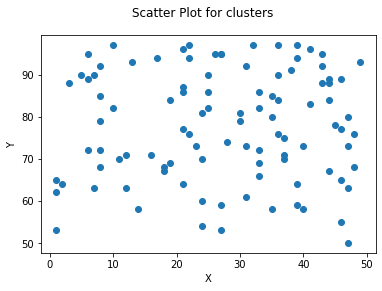

In [ ]:

import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Scatter Plot for clusters')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.scatter(data[:,0],data[:,1])

**3.Function that deals with distancing , clustering and plotting**

In [ ]:
def hierarchical_clustering(data,linkage,no_of_clusters):  
    #first step is to calculate the initial distance matrix
    #it consists distances from all the point to all the point
    color = ['r','g','b','y','c','m','k','w']
    initial_distances = pairwise_distances(data,metric='euclidean')
    #making all the diagonal elements infinity 
    np.fill_diagonal(initial_distances,sys.maxsize)
    clusters = find_clusters(initial_distances,linkage) 
    
    #plotting the clusters
    iteration_number = initial_distances.shape[0] - no_of_clusters
    clusters_to_plot = clusters[iteration_number]
    arr = np.unique(clusters_to_plot)
    
    indices_to_plot = []
    fig = plt.figure()
    fig.suptitle('Scatter Plot for clusters')
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    for x in np.nditer(arr):
        indices_to_plot.append(np.where(clusters_to_plot==x))
    p=0
    
    print(clusters_to_plot)
    for i in range(0,len(indices_to_plot)):
        for j in np.nditer(indices_to_plot[i]):
               ax.scatter(data[j,0],data[j,1], c= color[p])
        p = p + 1
        
    plt.show()

**4.This function finds minimum element and updates proximity matrix.**

In [ ]:
def find_clusters(input,linkage):
    clusters = {}
    row_index = -1
    col_index = -1
    array = []
    

    for n in range(input.shape[0]):
        array.append(n)
        
    clusters[0] = array.copy()

    #finding minimum value from the distance matrix
    #note that this loop will always return minimum value from bottom triangle of matrix
    for k in range(1, input.shape[0]):
        min_val = sys.maxsize
        
        for i in range(0, input.shape[0]):
            for j in range(0, input.shape[1]):
                if(input[i][j]<=min_val):
                    min_val = input[i][j]
                    row_index = i
                    col_index = j
        
        #once we find the minimum value, we need to update the distance matrix
        #updating the matrix by calculating the new distances from the cluster to all points
        
        #for Single Linkage
        if(linkage == "single" or linkage =="Single"):
            for i in range(0,input.shape[0]):
                if(i != col_index):
                    #we calculate the distance of every data point from newly formed cluster and update the matrix.
                    temp = min(input[col_index][i],input[row_index][i])
                    #we update the matrix symmetrically as our distance matrix should always be symmetric
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        #for Complete Linkage
        elif(linkage=="Complete" or linkage == "complete"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = min(input[col_index][i],input[row_index][i])
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        #for Average Linkage
        elif(linkage=="Average" or linkage == "average"):
             for i in range(0,input.shape[0]):
                if(i != col_index and i!=row_index):
                    temp = (input[col_index][i]+input[row_index][i])/2
                    input[col_index][i] = temp
                    input[i][col_index] = temp
        
        elif(linkage=="Centroid" or linkage =="centroid"):
            for i in range(0,input.shape[0]):
                if(i!=col_index and i!=row_index):
                    dist_centroid = cal_dist_from_centroid(i,row_index,col_index)
                    input[col_index][i] = dist_centroid
                    input[i][col_index] = dist_centroid
                   
        #set the rows and columns for the cluster with higher index i.e. the row index to infinity
        #Set input[row_index][for_all_i] = infinity
        #set input[for_all_i][row_index] = infinity
        for i in range (0,input.shape[0]):
            input[row_index][i] = sys.maxsize
            input[i][row_index] = sys.maxsize
            
        #Manipulating the dictionary to keep track of cluster formation in each step
        #if k=0,then all datapoints are clusters
       
        minimum = min(row_index,col_index)
        maximum = max(row_index,col_index)
        for n in range(len(array)):
            if(array[n]==maximum):
                array[n] = minimum
        clusters[k] = array.copy()
           
    return clusters

**5.different clusters shown as different colors**

[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 11, 1, 13, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 40, 13, 1, 0, 1, 0, 1, 47, 0, 1, 1, 0, 1, 1, 1, 0, 11, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1]


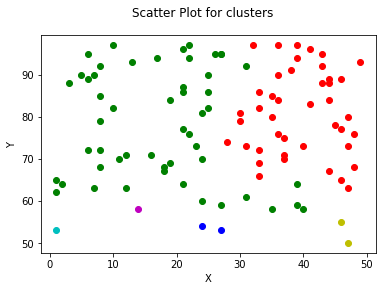

In [ ]:
hierarchical_clustering(data,"single",6)

**6.DATA POINTS WITH SMALEEST EUCLIDEAN DISTANCE BETWEEN ARE TAKEN INTO SINGLE CLUSTERS**


* Data point (2,5) clustered together

[0, 1, 1, 3, 3, 3, 6, 0, 8, 3, 0, 3, 3, 0, 1, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 1, 3, 8, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 8, 3, 0, 3, 3, 6, 3, 3, 3]


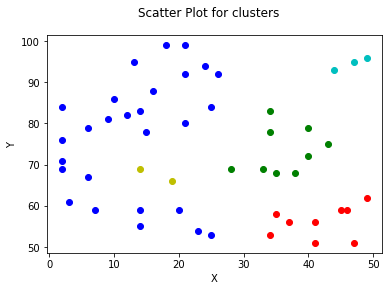

In [ ]:
hierarchical_clustering(data,"single",5)
#you can see that the color of data[2] and data[5] became same, thus they are in same cluster now

**AND THIS PROCESS GOES ON UNTIL THERE IS ONE SINGLE CLUSTER**

* Data point (1,4) is new cluster after (2,5)

[0, 1, 1, 3, 3, 3, 3, 0, 8, 3, 0, 3, 3, 0, 1, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 1, 3, 8, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 1, 1, 8, 3, 0, 3, 3, 3, 3, 3, 3]


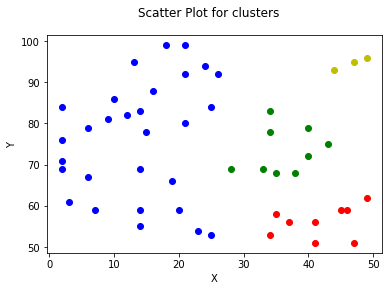

In [ ]:
hierarchical_clustering(data,"single",4)
#you can see that the color of data[1] and data[4] also became same in color, thus they are in same cluster nowproximity.shape

* data points (1,4) and (2,5) are now one single cluster

[0, 1, 1, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 8, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 8, 0, 0, 0, 0, 0, 0, 0, 0]


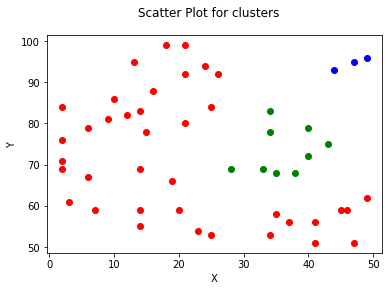

In [ ]:
hierarchical_clustering(data,"single",3)


* It goes on and adds data point (3) with [ [1,4] , [2,5] ]

[0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0]


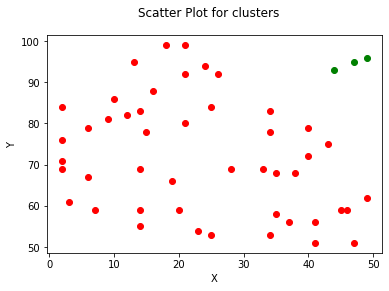

In [ ]:
hierarchical_clustering(data,"single",2)

* Finally one single cluster is there : [ [2,5] , [1,4] , [3] , [0] ]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


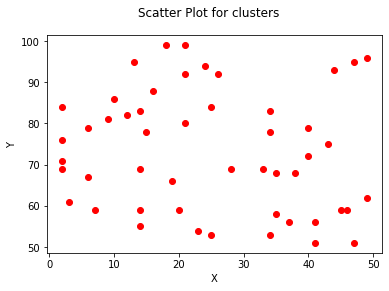

In [ ]:
hierarchical_clustering(data,"single",1)

**7.Final representation using dendrogram**

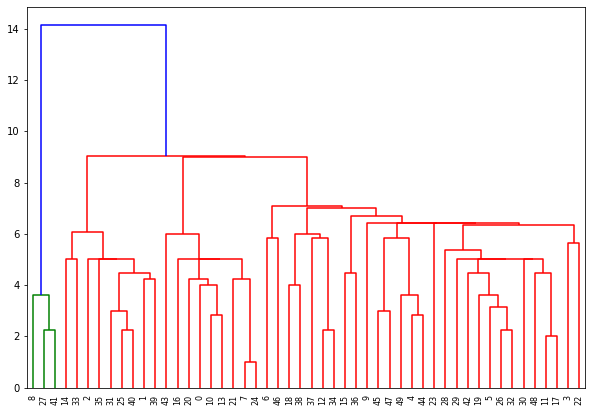

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(data, 'single')

labelList = range(0, 50)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='ascending',
            show_leaf_counts=True)
plt.show()